In [1]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Embedding
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import tensorflow as tf

# Set up threading for TensorFlow to utilize CPU better
tf.config.threading.set_intra_op_parallelism_threads(6)  # Adjust the number of threads as needed for operations that can be parallelized internally
tf.config.threading.set_inter_op_parallelism_threads(2)  # Adjust the number of threads for parallelizing independent non-blocking operations

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))  # Check if TensorFlow detects any GPU


Num GPUs Available:  0


In [2]:

import os

# Read all poems from the specified folder and ensure newline is treated as a separate token
folder_path = "C:/Users/josep/OneDrive/Desktop/Erdos/poezija/poezija/"
corpus = ""

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        with open(os.path.join(folder_path, filename), 'r', encoding="utf-8") as file:
            content = file.read().strip()
            content = content.replace("\n", " \n ")  # Ensure newline is treated as a separate token
            corpus += content + " \n "  # Add newline at the end of each poem

tokenizer = Tokenizer()
corpus = corpus.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


In [3]:
#print(tokenizer.word_index)
print(total_words)

18565


In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index)

In [6]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Embedding
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(total_words, 260, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

# Add the callback to your model training
history = model.fit(xs, ys, epochs=100, verbose=1, callbacks=[earlystop])


c:\Users\josep\anaconda3\envs\erdos_sp_2024\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 108s 71ms/step - accuracy: 0.0295 - loss: 9.2700
Epoch 2/100
   2/1491 ━━━━━━━━━━━━━━━━━━━━ 1:53 76ms/step - accuracy: 0.0781 - loss: 11.2753

c:\Users\josep\anaconda3\envs\erdos_sp_2024\Lib\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1491/1491 ━━━━━━━━━━━━━━━━━━━━ 111s 74ms/step - accuracy: 0.0173 - loss: 11.3254
Epoch 3/100
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 112s 75ms/step - accuracy: 0.0285 - loss: 9.3166
Epoch 4/100
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 108s 72ms/step - accuracy: 0.0708 - loss: 7.7780
Epoch 5/100
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 112s 75ms/step - accuracy: 0.1373 - loss: 6.6874
Epoch 6/100
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 111s 75ms/step - accuracy: 0.1986 - loss: 5.9637
Epoch 7/100
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 108s 73ms/step - accuracy: 0.2394 - loss: 5.4451
Epoch 8/100
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 107s 72ms/step - accuracy: 0.2690 - loss: 5.1228
Epoch 9/100
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 98s 65ms/step - accuracy: 0.2920 - loss: 4.9352
Epoch 10/100
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 95s 64ms/step - accuracy: 0.3187 - loss: 4.5852
Epoch 11/100
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 94s 63ms/step - accuracy: 0.3422 - loss: 4.4540
Epoch 12/100
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 94s 63ms/step - accuracy: 0.3514 - loss: 4.4607


In [9]:
# Save the model using the native Keras format
#tf.keras.models.save_model(model, 'C:/Users/josep/OneDrive/Desktop/Erdos/poezija/poezija/modelly2.keras')
model.save('C:/Users/josep/OneDrive/Desktop/Erdos/poezija/poezija/modelly2.h5')


In [10]:
# Save the model using the native Keras format
model.save('C:/Users/josep/OneDrive/Desktop/Erdos/poezija/poezija/modelly2.keras')


In [11]:

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
     

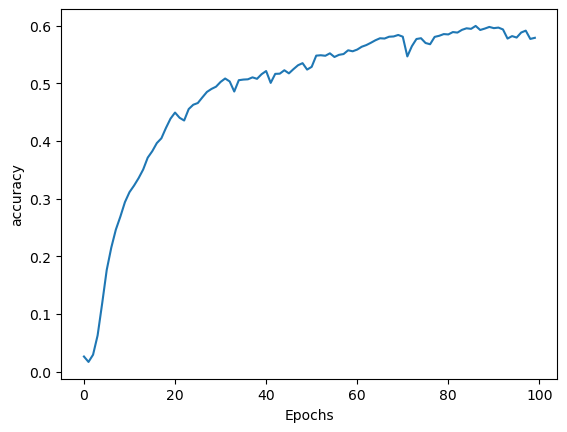

In [12]:

plot_graphs(history, 'accuracy')

In [19]:

seed_text = "lovoje naktis viltyje rami"
next_words = 25
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
lovoje naktis viltyje rami dangaus ik šiolei globo